# Imports

In [22]:
# Imports

import kagglehub
import pandas as pd
import numpy as np
import sklearn.utils as skut
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, r2_score
from IPython.display import Markdown
from sklearn.calibration import LinearSVC
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV


# Data collection and preparation

In [23]:
# Downloading dataset

path = kagglehub.dataset_download("denkuznetz/traffic-accident-prediction")
file = "dataset_traffic_accident_prediction1.csv"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\testk\.cache\kagglehub\datasets\denkuznetz\traffic-accident-prediction\versions\1


In [24]:
# Reading dataset with pandas

dataset = pd.read_csv(f'{path}/{file}', encoding = "ISO-8859-1")
dataset.head(20)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [25]:
# Dataset statistics

dataset.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [27]:
# Handling missing values

dataset.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [28]:
# Taking care of duplicates

df = dataset

df.duplicated().sum() 

14

In [29]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [30]:
# Ensure we're working on a copy of the DataFrame to avoid warnings
df = df.copy()

# Filling NaN values for numeric fields
numeric_fields = ['Driver_Experience', 'Speed_Limit', 'Number_of_Vehicles', 
                  'Driver_Alcohol', 'Traffic_Density', 'Driver_Age', 'Accident']

for field in numeric_fields:
    df[field] = df[field].fillna(df[field].mean()).astype(int)

# Handling non-numeric fields
categorical_fields = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 
                      'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']

for field in categorical_fields:
    df[field] = df[field].fillna(df[field].mode()[0])
    
# Check for remaining NaN values
print(df.isnull().sum())
df

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1,100,5,0,Low,Wet,Car,51,48,Artificial Light,0
1,Clear,Rural Road,Night,0,120,3,0,Moderate,Wet,Truck,49,43,Artificial Light,0
2,Rainy,Highway,Evening,1,60,4,0,Low,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60,3,0,Low,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195,11,0,Low,Dry,Car,62,55,Artificial Light,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2,30,4,0,Low,Dry,Car,23,15,Daylight,0
836,Rainy,Rural Road,Evening,2,60,4,0,Low,Dry,Motorcycle,52,46,Daylight,1
837,Foggy,Highway,Evening,0,30,4,1,High,Dry,Car,43,34,Artificial Light,0
838,Foggy,Highway,Afternoon,2,60,3,0,Low,Dry,Car,25,19,Artificial Light,0


In [31]:
# Encoding labels for accident severity

label_encoder = preprocessing.LabelEncoder() 

df['Accident_Severity']= label_encoder.fit_transform(df['Accident_Severity'])

df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1,100,5,0,1,Wet,Car,51,48,Artificial Light,0
1,Clear,Rural Road,Night,0,120,3,0,2,Wet,Truck,49,43,Artificial Light,0
2,Rainy,Highway,Evening,1,60,4,0,1,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60,3,0,1,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195,11,0,1,Dry,Car,62,55,Artificial Light,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2,30,4,0,1,Dry,Car,23,15,Daylight,0
836,Rainy,Rural Road,Evening,2,60,4,0,1,Dry,Motorcycle,52,46,Daylight,1
837,Foggy,Highway,Evening,0,30,4,1,0,Dry,Car,43,34,Artificial Light,0
838,Foggy,Highway,Afternoon,2,60,3,0,1,Dry,Car,25,19,Artificial Light,0


In [32]:
# One-Hot Encoding

df = pd.get_dummies(df, columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first = True)

df


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,1,100,5,0,1,51,48,0,False,True,...,True,False,False,False,True,True,False,False,False,False
1,0,120,3,0,2,49,43,0,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,60,4,0,1,54,52,0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,2,60,3,0,1,34,31,0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,195,11,0,1,62,55,1,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2,30,4,0,1,23,15,0,False,False,...,False,True,False,False,False,True,False,False,True,False
836,2,60,4,0,1,52,46,1,False,True,...,False,False,False,False,False,False,True,False,True,False
837,0,30,4,1,0,43,34,0,True,False,...,False,False,False,False,False,True,False,False,False,False
838,2,60,3,0,1,25,19,0,True,False,...,False,False,False,False,False,True,False,False,False,False


# Data analysis

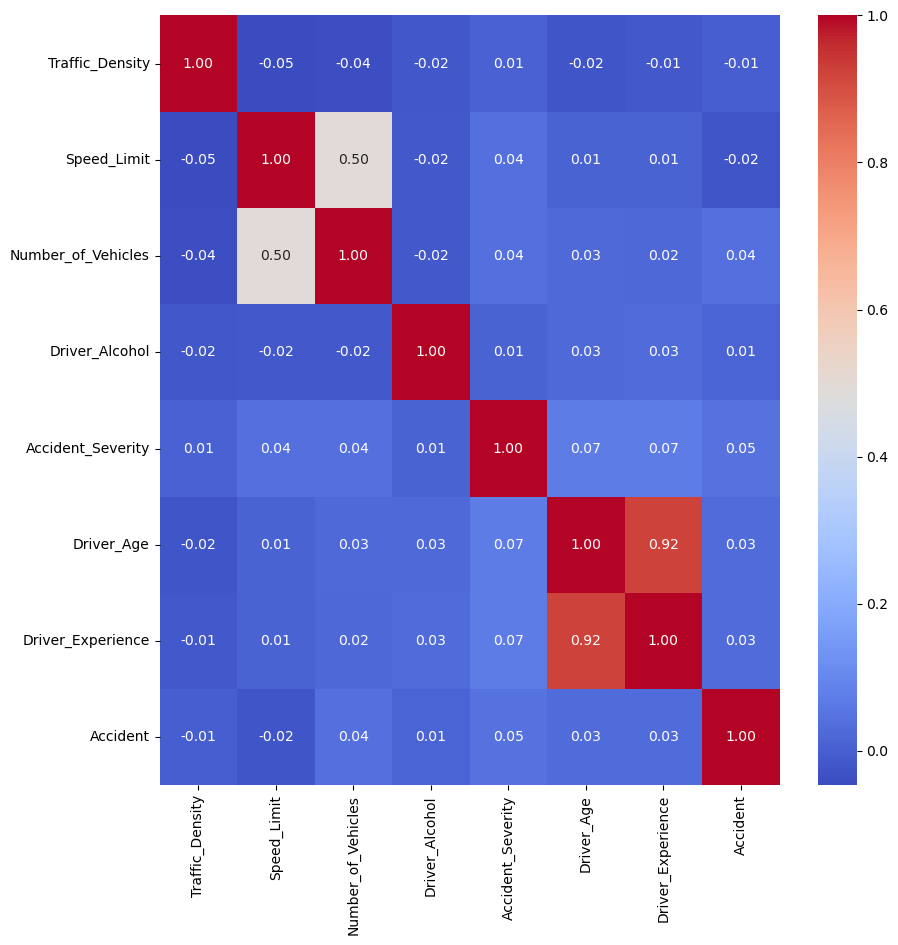

In [33]:
# Correlation matrix

numeric_fields = df.select_dtypes(include=['number'])

correlations = numeric_fields.corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlations, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f")

plt.show()

In [34]:
# Grabbing column names

column_names = df.columns
print(column_names)

Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
       'Driver_Alcohol', 'Accident_Severity', 'Driver_Age',
       'Driver_Experience', 'Accident', 'Weather_Foggy', 'Weather_Rainy',
       'Weather_Snowy', 'Weather_Stormy', 'Road_Type_Highway',
       'Road_Type_Mountain Road', 'Road_Type_Rural Road',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Road_Condition_Icy', 'Road_Condition_Under Construction',
       'Road_Condition_Wet', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_Truck', 'Road_Light_Condition_Daylight',
       'Road_Light_Condition_No Light'],
      dtype='object')


In [35]:
# Scaling the data to achieve mean value of 0 and deviation of 1

to_scale = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
scaler = RobustScaler()

df[to_scale] = scaler.fit_transform(df[to_scale])
df

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,1,1.333333,1.0,0,1,0.333333,0.384615,0,False,True,...,True,False,False,False,True,True,False,False,False,False
1,0,2.000000,0.0,0,2,0.250000,0.192308,0,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,0.000000,0.5,0,1,0.458333,0.538462,0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,2,0.000000,0.0,0,1,-0.375000,-0.269231,0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,4.500000,4.0,0,1,0.791667,0.653846,1,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2,-1.000000,0.5,0,1,-0.833333,-0.884615,0,False,False,...,False,True,False,False,False,True,False,False,True,False
836,2,0.000000,0.5,0,1,0.375000,0.307692,1,False,True,...,False,False,False,False,False,False,True,False,True,False
837,0,-1.000000,0.5,1,0,0.000000,-0.153846,0,True,False,...,False,False,False,False,False,True,False,False,False,False
838,2,0.000000,0.0,0,1,-0.750000,-0.730769,0,True,False,...,False,False,False,False,False,True,False,False,False,False


In [36]:
# Splitting the dataset into training and testing sets

x = df.drop(['Accident'], axis = 1)
y = df['Accident']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.33, random_state=100) 

In [ ]:
# Grid searching for the best model & parameters

def gen_model1():
    model = Pipeline([
        ('regr', LogisticRegression()),
    ])
    return model

model_gs1 = gen_model1()

params = [
    {
        'regr': [SVC()],
        'regr__kernel': ['linear', 'rbf', 'sigmoid'],
        'regr__C': [0.1, 0.2, 0.5, 1, 3],
    },{
        'regr': [RandomForestClassifier()],
        'regr__n_estimators': [150, 200, 300],
        'regr__max_depth': [3, 5, 10],
        'regr__min_samples_split': [2, 5, 10],
        'regr__min_samples_leaf': [1, 2, 4],
    }
]

grid = GridSearchCV(model_gs1, params, cv=5, scoring='accuracy')

grid.fit(train_x, train_y)


In [20]:
# Printing out grid search results

def displmd(*args, **kwargs): 
              display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

cvres = grid.cv_results_
cvresults = pd.DataFrame(cvres)

displmd(
    "# Grid search results - all data - all params",
    "## ",
    cvresults[["mean_test_score", "rank_test_score", "params"]]
    .sort_values(by="rank_test_score")
    .apply(lambda x: ({"test score": f"${x['mean_test_score']:.5f}$", "params": f"`{x['params']}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

# Grid search results - all data - all params

## 

|    | test score   | params                                                                                                                                             |
|---:|:-------------|:---------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | $0.71430$    | `{'regr': SVC(), 'regr__C': 0.1, 'regr__kernel': 'linear'}`                                                                                        |
| 51 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 2, 'regr__n_estimators': 150}`   |
| 50 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 10, 'regr__n_estimators': 300}`  |
| 49 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 10, 'regr__n_estimators': 200}`  |
| 48 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 10, 'regr__n_estimators': 150}`  |
| 94 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 10, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 10, 'regr__n_estimators': 200}` |
| 46 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 5, 'regr__n_estimators': 200}`   |
| 52 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 2, 'regr__n_estimators': 200}`   |
| 45 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 5, 'regr__n_estimators': 150}`   |
| 43 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 2, 'regr__n_estimators': 200}`   |
| 42 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 2, 'regr__n_estimators': 150}`   |
| 41 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 10, 'regr__n_estimators': 300}`  |
| 40 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 10, 'regr__n_estimators': 200}`  |
| 39 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 10, 'regr__n_estimators': 150}`  |
| 38 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 5, 'regr__n_estimators': 300}`   |
| 44 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 2, 'regr__n_estimators': 300}`   |
| 37 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 5, 'regr__n_estimators': 200}`   |
| 53 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 2, 'regr__n_estimators': 300}`   |
| 55 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 5, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 5, 'regr__n_estimators': 200}`   |
| 93 | $0.71430$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': 10, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 10, 'regr__n_estimators': 150}` |

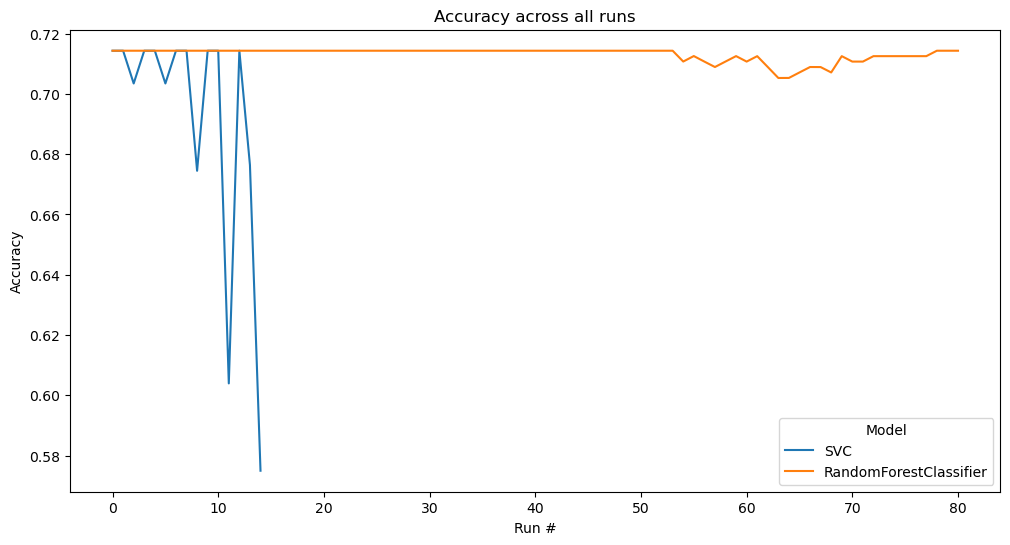

In [21]:
# Visualizing the grid search

results = pd.DataFrame(grid.cv_results_)

results['model'] = results['param_regr'].apply(lambda x: type(x).__name__)

plt.figure(figsize=(12, 6))

for model_name in results['model'].unique():
    model_data = results[results['model'] == model_name]
    plt.plot(
        range(len(model_data)),
        model_data['mean_test_score'],
        linestyle='-',
        label=model_name
    )

plt.title("Accuracy across all runs")
plt.xlabel("Run #")
plt.ylabel("Accuracy")
plt.legend(title = "Model")

plt.show()

